In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error, mean_absolute_error
import random
%matplotlib inline

1. Загрузите датасет taxi.csv.

In [2]:
data = pd.read_csv(r'D:\Python\FeatureEngineering\Diplom_FE\taxi.csv')

In [3]:
data.head(10)

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,-1.000,-1.000,Economy,private,0
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,Standard,private,1
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,Economy,private,0
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,-1.000,-1.000,Economy,private,1
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,Economy,private,1
5,1058203,6,15,6080,360328,55.818963,37.361033,55.814827,37.354074,6.747,9.800,Economy,private,0
6,103326,2,11,6080,615584,55.753508,37.663742,55.757251,37.659064,-1.000,-1.000,Standard,business,1
7,128861,5,20,6080,254374,55.839318,37.248862,55.839134,37.304101,1.517,3.933,Economy,private,0
8,493006,5,20,6080,753429,55.818748,37.338240,55.835764,37.294710,6.222,15.433,Economy,private,0
9,953983,6,7,6080,533820,55.839155,37.251947,55.833198,37.312197,10.410,23.083,Economy,private,0


   Посмотрите на данные. Отобразите общую информацию по признакам (вспомните о describe и info). 
   Напишите в markdown свои наблюдения.

In [4]:
data.describe()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,driver_response
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,5.662189e+05,3.159860,13.827790,3446.376360,460867.01291,55.700824,37.492292,55.772440,37.541637,18.393518,23.134841,0.492480
std,3.259360e+05,2.054222,7.306496,2038.738677,266064.98953,2.135903,1.454640,0.665985,0.467758,41.129296,33.890105,0.499946
min,4.000000e+00,0.000000,0.000000,14.000000,18.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2.855552e+05,1.000000,8.000000,1421.000000,229178.50000,55.708651,37.413497,55.708032,37.407117,-1.000000,-1.000000,0.000000
50%,5.656715e+05,3.000000,16.000000,3506.500000,462420.00000,55.772904,37.533664,55.772561,37.532537,10.411500,19.700000,0.000000
75%,8.487198e+05,5.000000,20.000000,5242.000000,690894.00000,55.960667,37.624113,55.962000,37.624358,30.665250,37.867000,1.000000
max,1.130355e+06,6.000000,23.000000,6806.000000,920344.00000,56.174097,38.280547,56.311121,38.243608,5234.283000,3958.283000,1.000000


In [5]:
data.describe(include='object')

,offer_class_group,ride_type_desc
count,100000,100000
unique,9,4
top,Economy,private
freq,48335,91207


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   offer_gk                100000 non-null  int64  
 1   weekday_key             100000 non-null  int64  
 2   hour_key                100000 non-null  int64  
 3   driver_gk               100000 non-null  int64  
 4   order_gk                100000 non-null  int64  
 5   driver_latitude         100000 non-null  float64
 6   driver_longitude        100000 non-null  float64
 7   origin_order_latitude   100000 non-null  float64
 8   origin_order_longitude  100000 non-null  float64
 9   distance_km             100000 non-null  float64
 10  duration_min            100000 non-null  float64
 11  offer_class_group       100000 non-null  object 
 12  ride_type_desc          100000 non-null  object 
 13  driver_response         100000 non-null  int64  
dtypes: float64(6), int64(

После предварительного просмотра мы видим следующее:
    1. offer_gk - номер заказа, будем удалять
    2. weekday_key - день недели. Минимальное значение 0, максимальное 6. Значит, считается с нуля.
    3. hour_key - час по 24 часовой системе
    4. driver_gk - идентификатор водителя
    5. order_gk - номер заказа (внутренний), удаляем
    6. driver_latitude - широта, где находится водитель. Минимум -1
    7. driver_longitude - долгота, где находится водитель. Минимум -1
    8. origin_order_latitude - широта, где находится заказчик. Минимум -1
    9. origin_order_longitude - долгота, где находится заказчик. Минимум -1
    10. distance_km - расстояние в км. Нужно более подробно рассмотреть минимум и максимум.
    11. duration_min - расстояние в мин. Также смотрим на минимум и максимум.
    12. offer_class_group - класс авто в заказе
    13. ride_type_desc - тип поездки (частная или бизнес)  
    
    Широту и долготу можно перевести в расстояние между клиентом и заказчиком.  

In [7]:
data['weekday_key'].value_counts()

5    19284
6    15466
0    14411
4    13290
1    13089
2    12859
3    11601
Name: weekday_key, dtype: int64

In [8]:
data['hour_key'].value_counts()

23    8184
21    7398
22    6881
0     6646
20    6566
19    6369
18    5889
17    5028
16    4500
15    4249
14    3584
8     3550
1     3467
13    3355
9     3298
12    3169
11    2890
10    2840
7     2482
2     2275
4     2193
5     1809
3     1768
6     1610
Name: hour_key, dtype: int64

In [9]:
data[data.duration_min < 0]

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,-1.0,-1.0,Economy,private,0
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,-1.0,-1.0,Economy,private,1
6,103326,2,11,6080,615584,55.753508,37.663742,55.757251,37.659064,-1.0,-1.0,Standard,business,1
19,533917,5,8,6080,596531,55.913718,37.401395,55.921554,37.403505,-1.0,-1.0,Standard,business,0
21,123897,4,12,6080,185909,55.766763,37.607275,55.772388,37.606330,-1.0,-1.0,Standard,business,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99979,1088748,1,2,2442,458538,55.961383,37.413560,55.962322,37.407117,-1.0,-1.0,Standard,private,0
99981,397745,1,23,2442,383092,55.961397,37.413560,55.962322,37.407117,-1.0,-1.0,Standard,private,0
99987,871592,4,23,2442,802677,55.961121,37.414019,55.961995,37.406355,-1.0,-1.0,Standard,private,0
99991,619039,6,23,2442,323136,55.961239,37.413497,55.962322,37.407117,-1.0,-1.0,Standard,private,0


In [10]:
data[data.duration_min < 1]

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,-1.0,-1.0,Economy,private,0
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,-1.0,-1.0,Economy,private,1
6,103326,2,11,6080,615584,55.753508,37.663742,55.757251,37.659064,-1.0,-1.0,Standard,business,1
19,533917,5,8,6080,596531,55.913718,37.401395,55.921554,37.403505,-1.0,-1.0,Standard,business,0
21,123897,4,12,6080,185909,55.766763,37.607275,55.772388,37.606330,-1.0,-1.0,Standard,business,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99981,397745,1,23,2442,383092,55.961397,37.413560,55.962322,37.407117,-1.0,-1.0,Standard,private,0
99987,871592,4,23,2442,802677,55.961121,37.414019,55.961995,37.406355,-1.0,-1.0,Standard,private,0
99991,619039,6,23,2442,323136,55.961239,37.413497,55.962322,37.407117,-1.0,-1.0,Standard,private,0
99992,1021230,1,1,2442,351741,55.961301,37.413497,55.966694,37.415754,0.0,0.0,Standard,private,0


Значений -1 много, примерно 26% от общего количества. Это, возможно, несостоявшиеся заказы, когда водитель взял 
заказ, но по какой-то причине не встретился с клиентом или клиент отказался ехать.
Эти значения будут мешать, так как водитель принимает решение брать или не брать заказ, когда видит его ценность,
а здесь у нас нет данных по расстоянию и минутам. Удаляю. Расстояние и время = 0, скорее всего ошибки, значений мало,
тоже удаляю.

In [11]:
data = data[data.duration_min >= 1]

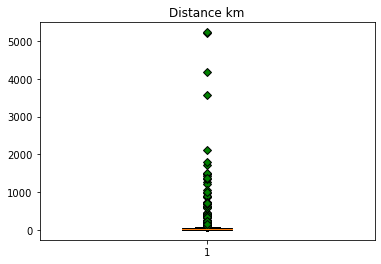

In [12]:
green_diamond = dict(markerfacecolor='g', marker='D')
fig3, ax3 = plt.subplots()
ax3.set_title('Distance km')
ax3.boxplot(data['distance_km'], flierprops=green_diamond)
plt.show()

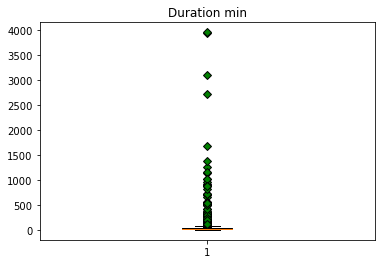

In [13]:
green_diamond = dict(markerfacecolor='g', marker='D')
fig3, ax3 = plt.subplots()
ax3.set_title('Duration min')
ax3.boxplot(data['duration_min'], flierprops=green_diamond)
plt.show()

In [14]:
data[data.duration_min > 1000]

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
6110,198416,4,17,2333,914494,55.733757,37.405701,55.734689,37.402236,1479.538,1014.283,Standard,private,0
10089,873470,1,16,6580,660752,55.831685,37.453510,55.827200,37.444590,1475.580,1149.667,Standard,private,0
13973,174541,1,20,5714,706021,55.808453,37.527302,55.809480,37.529113,1725.533,1254.050,Economy,private,1
14331,391059,6,15,2410,633727,55.602245,37.589453,55.592491,37.609445,1474.938,1159.000,XL,private,1
37485,552747,1,18,6666,219128,55.746030,37.537630,55.757527,37.549621,5215.793,3947.383,VIP,private,1
37639,538141,6,18,994,463224,55.767603,37.600957,55.769065,37.604302,4177.900,3112.217,Standard,private,1
53607,106985,2,12,1420,225632,55.713349,37.610444,55.712851,37.615602,1808.875,1389.567,Economy,private,1
67891,168924,6,21,989,452759,55.729859,37.654583,55.736360,37.655954,1512.828,1019.000,Economy,private,1
77201,158777,2,20,3309,636962,55.719059,37.628675,55.728879,37.623929,3563.968,2721.000,Standard,private,1
89462,689042,5,22,2272,247073,55.718765,37.566268,55.731907,37.560635,2120.626,1680.850,Standard,private,1


Будем считать эти значения выбросами, удалим их

In [15]:
data = data.loc[data['duration_min'] < 1000]

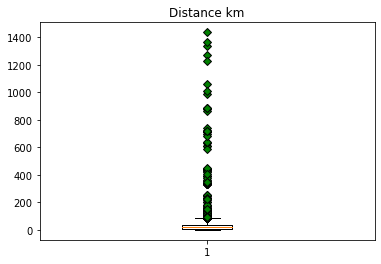

In [16]:
green_diamond = dict(markerfacecolor='g', marker='D')
fig3, ax3 = plt.subplots()
ax3.set_title('Distance km')
ax3.boxplot(data['distance_km'], flierprops=green_diamond)
plt.show()

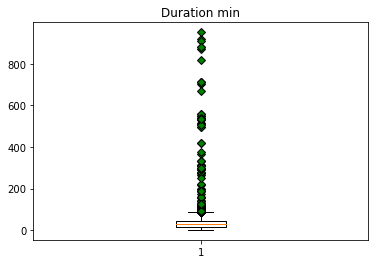

In [17]:
green_diamond = dict(markerfacecolor='g', marker='D')
fig3, ax3 = plt.subplots()
ax3.set_title('Duration min')
ax3.boxplot(data['duration_min'], flierprops=green_diamond)
plt.show()

In [18]:
data

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,Standard,private,1
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,Economy,private,0
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,Economy,private,1
5,1058203,6,15,6080,360328,55.818963,37.361033,55.814827,37.354074,6.747,9.800,Economy,private,0
7,128861,5,20,6080,254374,55.839318,37.248862,55.839134,37.304101,1.517,3.933,Economy,private,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,726210,0,2,2442,27360,55.961246,37.413497,55.966694,37.415754,17.378,29.817,Economy,private,0
99996,881472,0,1,2442,381960,55.961246,37.413497,55.964892,37.413543,7.751,12.683,Economy,private,0
99997,626673,1,20,2442,627126,55.961315,37.413497,55.962203,37.416373,46.983,46.217,Standard,private,0
99998,672584,6,21,2442,140623,55.961354,37.413864,55.964892,37.413543,50.029,51.100,Economy,private,0


In [19]:
data['offer_class_group'].unique()

array(['Standard', 'Economy', 'XL', 'Kids', 'Delivery', 'Premium', 'VIP',
       'VIP+'], dtype=object)

In [20]:
data['ride_type_desc'].unique()

array(['private', 'business', 'SMB'], dtype=object)

In [21]:
data['driver_gk'].unique()

array([6080, 3016, 6272, 3929, 4215, 1706, 6608, 2115, 1479, 5828, 6792,
       1514, 4269, 6023, 6486,  476, 2990, 2714, 5187, 5909, 3277,  156,
       1399, 3842, 2749, 3204, 2333, 6299,  984, 4811, 5348, 1186, 3507,
       6247, 3303, 4370, 3082, 5512, 4701, 5059, 1835, 6580, 2758, 4676,
        758, 5389, 4282, 3102, 3763, 1647, 3926, 2285, 5072,   51, 2487,
       4791, 1280, 2291, 5995, 6450, 5714, 3453, 6404, 2410, 3968,   80,
       4245, 2401, 3860,  422, 4158,  733, 5823, 2337, 5935, 3411, 6289,
       4297, 3270, 5718, 3757, 2722, 6800, 4014, 5794, 1507,   81, 5286,
       5874, 2221, 5423, 5482, 3127, 5727, 3633, 5006, 3110,  586, 6620,
       4759, 5897, 3869, 6385,  458, 5544, 2273, 1344,  949, 4974, 2939,
       3572, 2055,  962, 4865, 2183, 3684, 2844, 2765, 5148, 4339,  801,
       2236, 4600, 4804, 4100, 1793,  668, 2381, 1060, 5917, 6290, 6762,
       4735, 5731, 3777, 6443, 3162, 2770, 2848, 4946, 3292, 5242, 4430,
       1944, 1562, 3399, 6534,  696, 5437, 6713, 40

Значений слишком много, придется удалить

In [22]:
data = data.drop(['driver_gk'], axis = 1)

In [23]:
data = data.drop(['offer_gk', 'order_gk'], axis = 1)

In [24]:
data.describe()

,weekday_key,hour_key,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,driver_response
count,73596.000000,73596.000000,73596.000000,73596.000000,73596.000000,73596.000000,73596.000000,73596.000000,73596.00000
mean,3.150117,13.806185,55.766150,37.536506,55.771596,37.540392,24.943820,31.486411,0.47167
std,2.077994,7.313495,0.924854,0.638861,0.712241,0.498646,26.795014,22.112589,0.49920
min,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046000,1.067000,0.00000
25%,1.000000,8.000000,55.705723,37.413468,55.705457,37.407117,7.967750,16.629000,0.00000
50%,3.000000,16.000000,55.774821,37.528298,55.775010,37.527229,18.680000,28.233000,0.00000
75%,5.000000,20.000000,55.961102,37.625586,55.962322,37.625444,38.790500,44.383000,1.00000
max,6.000000,23.000000,56.018542,38.232760,56.025061,38.204119,1437.253000,951.733000,1.00000


Снова есть значения -1, но теперь в столбцах с широтой и долготой. Возможно, ошибка базы.

In [25]:
data[data.driver_longitude <= 0]

,weekday_key,hour_key,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
2129,1,1,-1.0,-1.0,55.415361,37.898917,83.923,81.350,Standard,business,1
2142,6,3,-1.0,-1.0,55.415361,37.898917,70.529,65.000,Standard,business,1
2649,3,22,-1.0,-1.0,55.415361,37.898917,45.879,61.300,Standard,business,1
2731,2,22,-1.0,-1.0,55.415361,37.898917,105.126,92.550,Standard,business,1
2759,0,23,-1.0,-1.0,55.415361,37.898917,53.921,68.000,Standard,business,1
6337,5,20,-1.0,-1.0,55.414400,37.896652,34.004,37.700,Standard,private,1
9554,0,23,-1.0,-1.0,55.415361,37.898917,57.712,69.767,Standard,business,1
13921,1,12,-1.0,-1.0,55.771656,37.661712,18.294,26.017,Standard,business,1
14867,5,20,-1.0,-1.0,55.414400,37.896652,39.508,44.717,Economy,private,1
19821,3,23,-1.0,-1.0,55.758781,37.556659,40.973,53.450,Economy,private,1


In [26]:
data[data.origin_order_latitude <= 0]

,weekday_key,hour_key,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
1687,6,17,55.730637,37.491326,-1.0,-1.0,2.942,6.300,Economy,private,1
43328,3,10,55.762383,37.772572,-1.0,-1.0,14.127,21.433,Economy,private,1
43688,3,18,55.640164,37.534014,-1.0,-1.0,9.998,22.133,Standard,private,1
51365,0,20,55.619920,37.395172,-1.0,-1.0,28.607,32.967,Economy,private,0
56004,3,19,55.758792,37.749308,-1.0,-1.0,11.281,21.167,Economy,private,1
58769,2,7,55.638462,37.335678,-1.0,-1.0,48.557,47.300,Economy,private,0
64117,5,15,55.753351,37.667157,-1.0,-1.0,2.252,7.400,Standard,private,1
64694,3,20,55.741113,37.618121,-1.0,-1.0,7.199,20.200,Premium,private,1
67170,5,16,55.770791,37.511972,-1.0,-1.0,13.997,27.717,Standard,private,1
92696,5,15,55.786988,37.615918,-1.0,-1.0,3.504,12.517,Economy,private,0


Значения с широтой и долготой меньше 0 тоже удаляем. 

In [27]:
data = data[data.driver_longitude > 0]
data = data[data.origin_order_latitude > 0]

Из столбцов с широтой и долготой получаем расстояние между водителем и заказчиком. Исходные столбцы удаляем.

In [28]:
import math

def distans_driver_order(data):
    for i in data:
 #pi - число pi, rad - радиус сферы (Земли)
# def destination_driver_customer(data):
    
        rad = 6372795
 
 #координаты двух точек
        llat1 = data['driver_latitude']
        llong1 = data['driver_longitude']
 
        llat2 = data['origin_order_latitude']
        llong2 = data['origin_order_longitude']
 
 #в радианах
        lat1 = llat1*math.pi/180.
        lat2 = llat2*math.pi/180.
        long1 = llong1*math.pi/180.
        long2 = llong2*math.pi/180.
 
 #косинусы и синусы широт и разницы долгот
        cl1 = math.cos(lat1)
        cl2 = math.cos(lat2)
        sl1 = math.sin(lat1)
        sl2 = math.sin(lat2)
        delta = long2 - long1
        cdelta = math.cos(delta)
        sdelta = math.sin(delta)
 
 #вычисления длины большого круга
        y = math.sqrt(math.pow(cl2*sdelta,2)+math.pow(cl1*sl2-sl1*cl2*cdelta,2))
        x = sl1*sl2+cl1*cl2*cdelta
        ad = math.atan2(y,x)
        i = ad*rad/1000
        
        return i

In [29]:
data['dist_driver_order']= data.apply(distans_driver_order, axis = 1)

In [30]:
data = data.drop(['driver_latitude', 'driver_longitude', 'origin_order_latitude', 'origin_order_longitude'], axis = 1)

In [31]:
data.head()

,weekday_key,hour_key,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response,dist_driver_order
1,5,14,18.802,25.217,Standard,private,1,3.414054
2,6,14,6.747,9.800,Economy,private,0,0.410115
4,4,16,12.383,19.250,Economy,private,1,1.062781
5,6,15,6.747,9.800,Economy,private,0,0.633046
7,5,20,1.517,3.933,Economy,private,0,3.450036


In [32]:
data.describe()

,weekday_key,hour_key,distance_km,duration_min,driver_response,dist_driver_order
count,73566.000000,73566.000000,73566.000000,73566.000000,73566.000000,73566.000000
mean,3.150232,13.805712,24.938556,31.481966,0.471522,0.987229
std,2.077986,7.313868,26.792805,22.110491,0.499192,0.940609
min,0.000000,0.000000,0.046000,1.067000,0.000000,0.000000
25%,1.000000,8.000000,7.967000,16.617000,0.000000,0.404659
50%,3.000000,16.000000,18.677500,28.233000,0.000000,0.649669
75%,5.000000,20.000000,38.785000,44.367000,1.000000,1.314818
max,6.000000,23.000000,1437.253000,951.733000,1.000000,22.299777


Есть большие значения у расстояния между водителем и заказчиком, посмотрим их

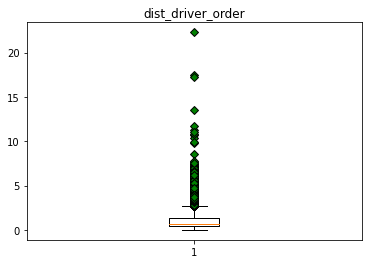

In [33]:
green_diamond = dict(markerfacecolor='g', marker='D')
fig3, ax3 = plt.subplots()
ax3.set_title('dist_driver_order')
ax3.boxplot(data['dist_driver_order'], flierprops=green_diamond)
plt.show()

In [34]:
data[data.dist_driver_order>10]

,weekday_key,hour_key,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response,dist_driver_order
14281,6,7,21.830,35.517,XL,private,1,11.258515
14296,0,17,20.427,33.167,XL,private,0,10.756048
14327,5,0,441.316,274.717,XL,private,1,10.374920
22998,5,17,3.190,8.817,Economy,private,1,22.299777
23462,1,0,24.566,28.167,Economy,private,0,17.437760
45874,0,18,18.535,36.533,XL,private,1,10.796345
70981,4,21,45.907,48.650,Economy,private,0,13.527906
74098,2,19,33.363,41.250,Standard,private,0,11.759217
75757,6,6,26.790,32.733,XL,private,1,11.047514
98572,0,15,4.894,9.650,Economy,private,0,17.277807


Расстояние 11 км у класса XL, скорее всего у них стоянка находится не в городе, машины большие. Их осталю, удаляю 
более 15 км

In [35]:
data = data[data.dist_driver_order < 15]

После преобразования таблицы остались вещественные признаки:
    distance_km	
    duration_min
    dist_driver_order
    
И категориальные признаки:
    weekday_key 
    hour_key 
    offer_class_group 
    ride_type_desc 
 Категориальные признаки нужно преобразовать OneHotEncoder

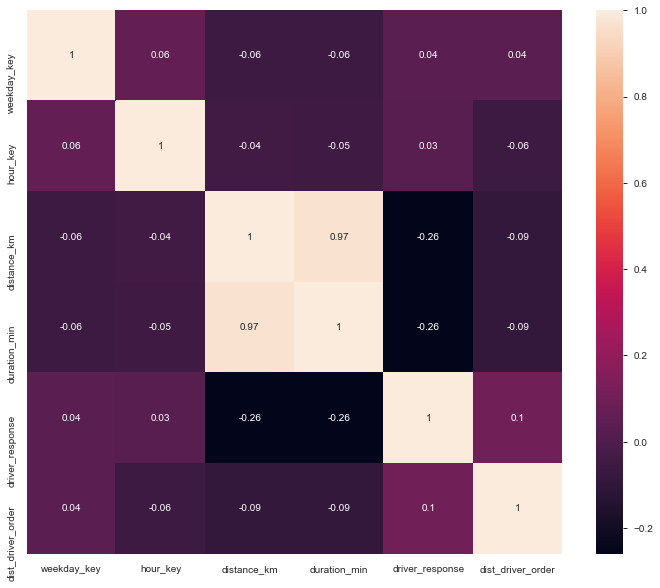

In [36]:
import numpy as np
import seaborn as sns
import pandas_profiling


from matplotlib import pyplot as plt
from pandas_profiling import ProfileReport

correlation_matrix = data.corr().round(2)
fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(data=correlation_matrix, annot=True)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73563 entries, 1 to 99999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   weekday_key        73563 non-null  int64  
 1   hour_key           73563 non-null  int64  
 2   distance_km        73563 non-null  float64
 3   duration_min       73563 non-null  float64
 4   offer_class_group  73563 non-null  object 
 5   ride_type_desc     73563 non-null  object 
 6   driver_response    73563 non-null  int64  
 7   dist_driver_order  73563 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 5.1+ MB


##### Преобразовываем признаки

In [635]:
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# label_enc = LabelEncoder()
# oh_enc = OneHotEncoder()

In [38]:
data['weekday_key'] = data['weekday_key'].astype('category')
data['hour_key'] = data['hour_key'].astype('category')
data['offer_class_group'] = data['offer_class_group'].astype('category')
data['ride_type_desc'] = data['ride_type_desc'].astype('category')
data = pd.get_dummies(data)

In [39]:
data

,distance_km,duration_min,driver_response,dist_driver_order,weekday_key_0,weekday_key_1,weekday_key_2,weekday_key_3,weekday_key_4,weekday_key_5,...,offer_class_group_Economy,offer_class_group_Kids,offer_class_group_Premium,offer_class_group_Standard,offer_class_group_VIP,offer_class_group_VIP+,offer_class_group_XL,ride_type_desc_SMB,ride_type_desc_business,ride_type_desc_private
1,18.802,25.217,1,3.414054,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
2,6.747,9.800,0,0.410115,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,12.383,19.250,1,1.062781,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
5,6.747,9.800,0,0.633046,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
7,1.517,3.933,0,3.450036,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,17.378,29.817,0,0.622038,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
99996,7.751,12.683,0,0.405541,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
99997,46.983,46.217,0,0.204490,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
99998,50.029,51.100,0,0.394026,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [51]:
data_attribute = data.drop(['driver_response'], axis = 1)
data_attribute.head()

,distance_km,duration_min,dist_driver_order,weekday_key_0,weekday_key_1,weekday_key_2,weekday_key_3,weekday_key_4,weekday_key_5,weekday_key_6,...,offer_class_group_Economy,offer_class_group_Kids,offer_class_group_Premium,offer_class_group_Standard,offer_class_group_VIP,offer_class_group_VIP+,offer_class_group_XL,ride_type_desc_SMB,ride_type_desc_business,ride_type_desc_private
1,18.802,25.217,3.414054,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,6.747,9.800,0.410115,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,12.383,19.250,1.062781,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
5,6.747,9.800,0.633046,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
7,1.517,3.933,3.450036,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1


In [52]:
Y = data['driver_response']

#### Нормализуем числовые значения

In [55]:
# data_attribute = data[['distance_km', 'duration_min', 'dist_driver_order']]
# Выделим колонки в отдельный список
headers = list(data_attribute.columns.values)

In [56]:
# Нормализуем параметры
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(data_attribute)
df_norm = pd.DataFrame(np_scaled)
df_norm

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,-0.973899,-0.949194,-0.495258,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,...,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
1,-0.990675,-0.981628,-0.939368,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,...,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
2,-0.982832,-0.961747,-0.842876,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,...,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
3,-0.990675,-0.981628,-0.906409,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,...,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
4,-0.997953,-0.993971,-0.489938,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,...,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73558,-0.975881,-0.939516,-0.908036,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
73559,-0.989278,-0.975562,-0.940044,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
73560,-0.934683,-0.905014,-0.969768,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
73561,-0.930444,-0.894741,-0.941746,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,...,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0


In [57]:
# При нормализации стираются названия колонок, поэтому необходимо восстановить их:
df_norm.columns = headers
df_norm

,distance_km,duration_min,dist_driver_order,weekday_key_0,weekday_key_1,weekday_key_2,weekday_key_3,weekday_key_4,weekday_key_5,weekday_key_6,...,offer_class_group_Economy,offer_class_group_Kids,offer_class_group_Premium,offer_class_group_Standard,offer_class_group_VIP,offer_class_group_VIP+,offer_class_group_XL,ride_type_desc_SMB,ride_type_desc_business,ride_type_desc_private
0,-0.973899,-0.949194,-0.495258,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,...,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
1,-0.990675,-0.981628,-0.939368,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,...,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
2,-0.982832,-0.961747,-0.842876,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,...,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
3,-0.990675,-0.981628,-0.906409,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,...,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
4,-0.997953,-0.993971,-0.489938,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,...,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73558,-0.975881,-0.939516,-0.908036,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
73559,-0.989278,-0.975562,-0.940044,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
73560,-0.934683,-0.905014,-0.969768,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
73561,-0.930444,-0.894741,-0.941746,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,...,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0


#### делим данные на тестовые и тренировочные

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(data_attribute, Y, test_size=0.2)

#### используем модель Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(X_train,y_train)

RandomForestClassifier()

No handles with labels found to put in legend.


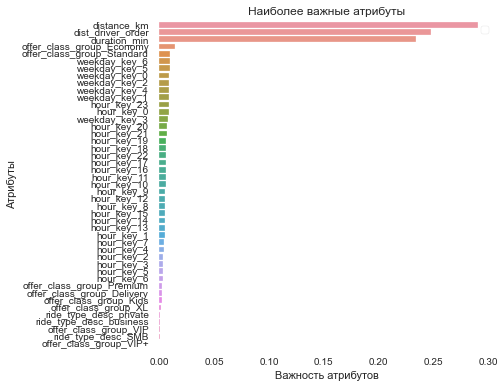

In [61]:
headers = list(X_train.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

In [62]:
from sklearn.metrics import classification_report
model_pred = model.predict(X_test)

print(classification_report(y_test, model_pred))

model.score(X_test, y_test)

              precision    recall  f1-score   support

           0       0.74      0.71      0.72      7785
           1       0.69      0.72      0.70      6928

    accuracy                           0.71     14713
   macro avg       0.71      0.71      0.71     14713
weighted avg       0.72      0.71      0.71     14713



0.7144022293210086

#### Попробуем использовать PCA

In [65]:
from sklearn.decomposition import PCA

rand_state = 1000
pca_decomp = PCA(n_components = 7)
X_pca = pca_decomp.fit_transform(data_attribute)
X_pca = pd.DataFrame(X_pca)

X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca, Y, test_size=0.2, random_state=rand_state)

model = RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(X_pca_train,y_pca_train)
# pca_est = lin_reg_fit(X_pca_train, X_pca_test, y_pca_train, y_pca_test)

# X_pca.head(5)

RandomForestClassifier()

In [66]:
from sklearn.metrics import classification_report
model_pred = model.predict(X_pca_test)

print(classification_report(y_pca_test, model_pred))

model.score(X_pca_test, y_pca_test)

              precision    recall  f1-score   support

           0       0.75      0.70      0.72      7861
           1       0.68      0.73      0.70      6852

    accuracy                           0.71     14713
   macro avg       0.71      0.71      0.71     14713
weighted avg       0.72      0.71      0.71     14713



0.7137905253857133